## COVID Early Warning System Project Overview

This project is an attempt to define a good early warning indicator for COVID outbreaks. States and public health agencies have a difficult job to keep COVID transmission under control. They could benefit from a system that provides them an early and accurate warning of an increase in new COVIC infections in their jurisdiction. 

This project grew out of an interest to compare the available data from states that had experienced an outbreak vs. states that hadn't experienced an outbreak. As the analysis progressed it became clear that common statistical measures of COVID-19 infection spread that are utilized today-- in particular, total cases, case rates, and positive test rates--are not all equally informative. One is better than the others, yet all of them have their shortcomings. Part of the project explores the shortcomings with the measures that are currently available. 

Taken together, this analysis helped to inform the idea of an alternative regional COVID-19 early warning system that addresses some of the shortcomings of the currently available tools. It could provide an early and accurate warning of an increase in new COVID infections, which could ultimately allow state governments and public health agencies to react sooner and keep an uptick from turning into an outbreak. This system is described in more detail [here](https://github.com/salvir1/covid-early-warning-system). 

### Goals

The high level goals of this project are:
- To characterize the difference at the regional level between an uptick and an outbreak in COVID case rates
- To develop statistics that could become the foundation of a COVID-19 earling warning system (described [here](https://github.com/salvir1/covid-early-warning-system))
- To work with various EDA and data visualization tools and techniques

### Tools and techniques used in this project

**Tools**
- Python, Jupyter Lab, SciKitLearn, Pandas, Numpy

**Visualization**
- Plotly, Matplotlib

**Techniques**
- Spatial mapping, simple moving average, simulation

### Raw data sourced from COVID Tracking Project

- Terms of use: The COVID Tracking Project at The Atlantic’s data and website content is published under a Creative Commons CC BY 4.0 license, which requires users to attribute the source and license type (CC BY 4.0) when sharing our data or website content.
- Citation: [the COVID Tracking Project](https://www.covidtrackingproject.com), Creative Commons CC BY 4.0 license

## State-level trend comparison shows time is critical when an outbreak is emerging

The state groupings help to sort the state trends in a meaningful way. One can see this by attempting to look at the death rate trendline at the state level for just 25 states. The chart below of daily COVID death rates by state over time is a confusion of squiggly lines, although one can start to see patterns if one looks long enough. 

<img align="center" src="img/COVID-deaths-by-state-large-group.png" width='1000' height='auto' ></img>

The state level trendlines become more understandable when states are presented in the same groupings as before. The following charts display the same COVID statistics of death rate, case, rate, and positive test rate, but now at the state level.

The state-level charts eveal the dangerous acceleration of a COVID outbreak more clearly. Note the steep upward trajectory of deaths and case rates for a number of states that experienced an outbreak. This underscores the importance of time in identifying a potential outbreak. Once an outbreak begins it can grow quickly and leave state governments and public health agencies scrambling to try to get ahead of a steep curve.  

<img align="center" src="img/COVID-deaths-by-state.png" width='1000' height='auto' ></img>

<img align="center" src="img/COVID-cases-by-state.png" width='1000' height='auto' ></img>

<img align="center" src="img/COVID-positive-test-rate-by-state.png" width='1000' height='auto' ></img>

While the groupings help to make sense of the state level data, there's one obvious problem with most of the trendlines no matter which grouping they fall into. They're all very noisy. If one is looking at these signals to determine if there's been an underlying and important shift in the rate of new COVID infections, the variability is going to delay that signal. This will be discussed more in the next section.

Another way to display changes over time at the state level is with an animation. Animations were constructed to demonstrate the dynamic ebb and flow of COVID-19 over time by state. These three animations show the geographic progression of the outbreaks over time. (Due to the limitations of the Github repo to run html in markdown language, you may need to copy the html files to a local folder and then open them to see the animation. Links to the files are here. They can be found in the img directory of this repo.)

[death rate animation](https://github.com/salvir1/outbreak-vs-uptick/blob/main/img/death-rate-map.html)

[case rate animation](https://github.com/salvir1/outbreak-vs-uptick/blob/main/img/case-rate-map.html)

[positive test rate animation](https://github.com/salvir1/outbreak-vs-uptick/blob/main/img/positive-rate-map.html)


In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [24]:
# Load in the COVID Tracking Project dataset by date and by state for US
covidtracking = pd.read_csv("https://api.covidtracking.com/v1/states/daily.csv")

In [25]:
covidtracking.columns

Index(['date', 'state', 'positive', 'probableCases', 'negative', 'pending',
       'totalTestResultsSource', 'totalTestResults', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'dataQualityGrade', 'lastUpdateEt', 'dateModified', 'checkTimeEt',
       'death', 'hospitalized', 'dateChecked', 'totalTestsViral',
       'positiveTestsViral', 'negativeTestsViral', 'positiveCasesViral',
       'deathConfirmed', 'deathProbable', 'totalTestEncountersViral',
       'totalTestsPeopleViral', 'totalTestsAntibody', 'positiveTestsAntibody',
       'negativeTestsAntibody', 'totalTestsPeopleAntibody',
       'positiveTestsPeopleAntibody', 'negativeTestsPeopleAntibody',
       'totalTestsPeopleAntigen', 'positiveTestsPeopleAntigen',
       'totalTestsAntigen', 'positiveTestsAntigen', 'fips', 'positiveIncrease',
       'negativeIncrease', 'total', 'totalTestResultsIncrease', 'posNe

In [26]:
df_state = covidtracking[['date', 'state', 'fips','positiveIncrease', 'deathIncrease', 'negativeIncrease']]
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13663 entries, 0 to 13662
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              13663 non-null  int64 
 1   state             13663 non-null  object
 2   fips              13663 non-null  int64 
 3   positiveIncrease  13663 non-null  int64 
 4   deathIncrease     13663 non-null  int64 
 5   negativeIncrease  13663 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 640.6+ KB


In [27]:
df_state['date'] = pd.to_datetime(df_state['date'], format='%Y%m%d')
df_state = df_state[df_state['date'] >= '2020-03-10']

In [28]:
df_state.state.unique()

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV',
       'WY'], dtype=object)

In [29]:
st_population = pd.read_csv('../data/state_abbrev.csv', thousands=',') # Load in state population counts and merge with ctp data
df_state = df_state.merge(st_population, how='inner' ,left_on='state', right_on='Code')
df_state.isna().sum() # No missing values!
df_state['CVD_group'] = df_state['CVD_group'].apply(lambda x: 'No outbreak' if x == 0 else x)
df_state['CVD_group'] = df_state['CVD_group'].apply(lambda x: 'Spring outbreak' if x == 1 else x)
df_state['CVD_group'] = df_state['CVD_group'].apply(lambda x: 'Summer outbreak' if x == 2 else x)
df_state['CVD_group'] = df_state['CVD_group'].apply(lambda x: 'Fall outbreak' if x == 3 else x)

### State-level case and death rate animations by week

In [30]:
# Prepare data table for the animation of deaths per 100,000 and cases per 100,000 by state.
# Group data by week for the animation, but convert it into a daily statistic for consistency with other charts

In [31]:
# Close out on a complete week (ending Sunday) when reporting weekly statistics.
today = datetime.date.today()
last_monday = pd.to_datetime(today + datetime.timedelta(days=-today.weekday(), weeks=0))
df_state = df_state[df_state['date'] < last_monday]
df_state = df_state.sort_values('date', ascending=True)

In [32]:
# Start by grouping by state and week. (Summing over the week speeds up the animation.)
df_state['week']=df_state['date'].dt.week
df_state_by_week = df_state.groupby(['week','state','Population']).agg(
                                    deaths = ('deathIncrease', 'sum'),
                                    cases = ('positiveIncrease','sum'),
                                    negatives = ('negativeIncrease','sum'),
                                    Date = ('date', 'max')).reset_index()

In [33]:
# Slight smoothing of death rate (2 weeks or 14 days total) to match the smoothing used in the groupings charts
death_SMA = []
for chart_state in df_state_by_week['state'].unique():
    state = df_state_by_week[df_state_by_week['state']== chart_state]
    death_SMA.append(state.iloc[:,3].rolling(window=2).mean())
df_state_by_week['death_SMA']= pd.concat(death_SMA)

In [34]:
# Calculate daily deaths per 100000.
df_state_by_week['deaths_per_100000'] = df_state_by_week['death_SMA'] / df_state_by_week['Population'] * 100000 / 7
df_state_by_week['cases_per_100000'] = df_state_by_week['cases'] / df_state_by_week['Population'] * 100000 / 7
df_state_by_week['positive_test_rate'] = df_state_by_week['cases'] / (df_state_by_week['cases'] + df_state_by_week['negatives'])

In [35]:
df_state_by_week['timestamp'] = df_state_by_week['Date'].apply(lambda x: x.date()).apply(str) # convert timestamp to a string 
df_state_by_week = df_state_by_week.sort_values('timestamp', ascending=True)

In [36]:
fig = px.choropleth(df_state_by_week,                   # Input Dataframe
                     locations="state",                 # state abbrev column
                     locationmode="USA-states",         # use plotly-supplied state geometries
                     color="cases_per_100000",          # feature column
                     hover_name="state",                # hover name
                     animation_frame="timestamp",       # date column
                     scope="usa",
                     color_continuous_scale = 'Viridis_r',  
                     range_color=[0,300/7],             # select range of dataset
                     labels={'cases_per_100000':'Cases per 100,000'},
                     title='Daily COVID cases per 100,000 residents'     
                     )                 
fig.write_html("img/case-rate-map.html", auto_open=True)                      

In [37]:
fig = px.choropleth(df_state_by_week,                   # Input Dataframe
                     locations="state",                 # state abbrev column
                     locationmode="USA-states",         # use plotly-supplied state geometries
                     color="positive_test_rate",        # feature column
                     hover_name="state",                # hover name
                     animation_frame="timestamp",       # date column
                     scope="usa",
                     color_continuous_scale = 'Viridis_r',  
                     range_color=[0,0.4],             # select range of dataset
                     labels={'positive_test_rate':'Positive test rate'},
                     title='COVID positive test rate'     
                     )                 
fig.write_html("img/positive-rate-map.html", auto_open=True)                      

In [38]:
fig = px.choropleth(df_state_by_week,                   # Input Dataframe
                     locations="state",                 # state abbrev column
                     locationmode="USA-states",         # use plotly-supplied state geometries
                     color="deaths_per_100000",         # feature column
                     hover_name="state",                # hover name
                     animation_frame="timestamp",       # date column
                     scope="usa",
                     color_continuous_scale = 'bluered',  
                     range_color=[0,5.5/7],             # select range of dataset
                     labels={'deaths_per_100000':'Deaths per 100,000'},
                     title='Daily COVID deaths per 100,000 residents'     
                     )        
fig.write_html("img/death-rate-map.html", auto_open=True)                      

### State level time series

In [39]:
# Calculate simple moving averages. 

case_SMA = []
death_SMA = []
negatives_SMA = []

for chart_state in df_state['state'].unique():
    state = df_state[df_state['state']== chart_state]
    df_state_by_week.sort_values('timestamp', ascending=True)
    case_SMA.append(state.iloc[:,3].rolling(window=14).mean())
    death_SMA.append(state.iloc[:,4].rolling(window=14).mean())
    negatives_SMA.append(state.iloc[:,5].rolling(window=14).mean())
df_state['case_SMA']= pd.concat(case_SMA)
df_state['death_SMA']= pd.concat(death_SMA)
df_state['negatives_SMA']= pd.concat(negatives_SMA)
df_state['positive_test_rate'] = df_state['case_SMA'] / (df_state['case_SMA'] + df_state['negatives_SMA'])
df_state['case_SMA'] = df_state['case_SMA'] / df_state['Population'] * 100000 # normalize by population
df_state['death_SMA'] = df_state['death_SMA'] / df_state['Population'] * 100000 # normalize by population

In [40]:
# Calculate the case_SMA change over 5, 10, 15 days to determine if rate of change correlates with groupings
case_SMA_5_day_change = []
case_SMA_10_day_change = []
case_SMA_15_day_change = []
for chart_state in df_state['state'].unique():
    state = df_state[df_state['state']== chart_state]
    case_SMA_5_day_change.append(state['case_SMA'] - state['case_SMA'].shift(5))
    case_SMA_10_day_change.append(state['case_SMA'] - state['case_SMA'].shift(10))
    case_SMA_15_day_change.append(state['case_SMA'] - state['case_SMA'].shift(15))
df_state['case_SMA_5_day_change']= pd.concat(case_SMA_5_day_change)
df_state['case_SMA_10_day_change']= pd.concat(case_SMA_10_day_change)
df_state['case_SMA_15_day_change']= pd.concat(case_SMA_15_day_change)


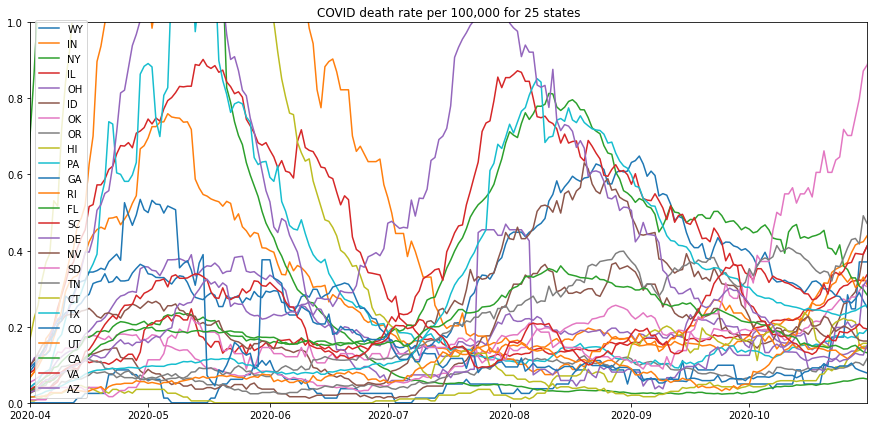

In [41]:
first, last = (0, 25)

# Death rate by state over time--ungrouped
fig, ax = plt.subplots(figsize = (15,7))
    
for chart_state in df_state['state'].unique()[first:last]:
    state_df = df_state[df_state['state']== chart_state]
#     state_df['case_SMA'] = state_df.iloc[:,3].rolling(window=14).mean()
#     state_df['death_SMA'] = state_df.iloc[:,4].rolling(window=14).mean()
#     temp_state_df = state_df[['date', 'death_SMA']]
#     temp_state_df['date'] = temp_state_df['date'] - timedelta(days=14)
#     state_df = state_df.merge(temp_state_df, on='date')
    ax.plot(state_df['date'], state_df['death_SMA'], label = chart_state)
    ax.set_xlim([datetime.date(2020, 4, 1), datetime.date(2020, 10, 31)])
    ax.set_ylim(0, 1)
    ax.set_title(f'COVID death rate per 100,000 for 25 states')
    ax.legend()
plt.savefig('img/COVID-deaths-by-state-large-group.png')

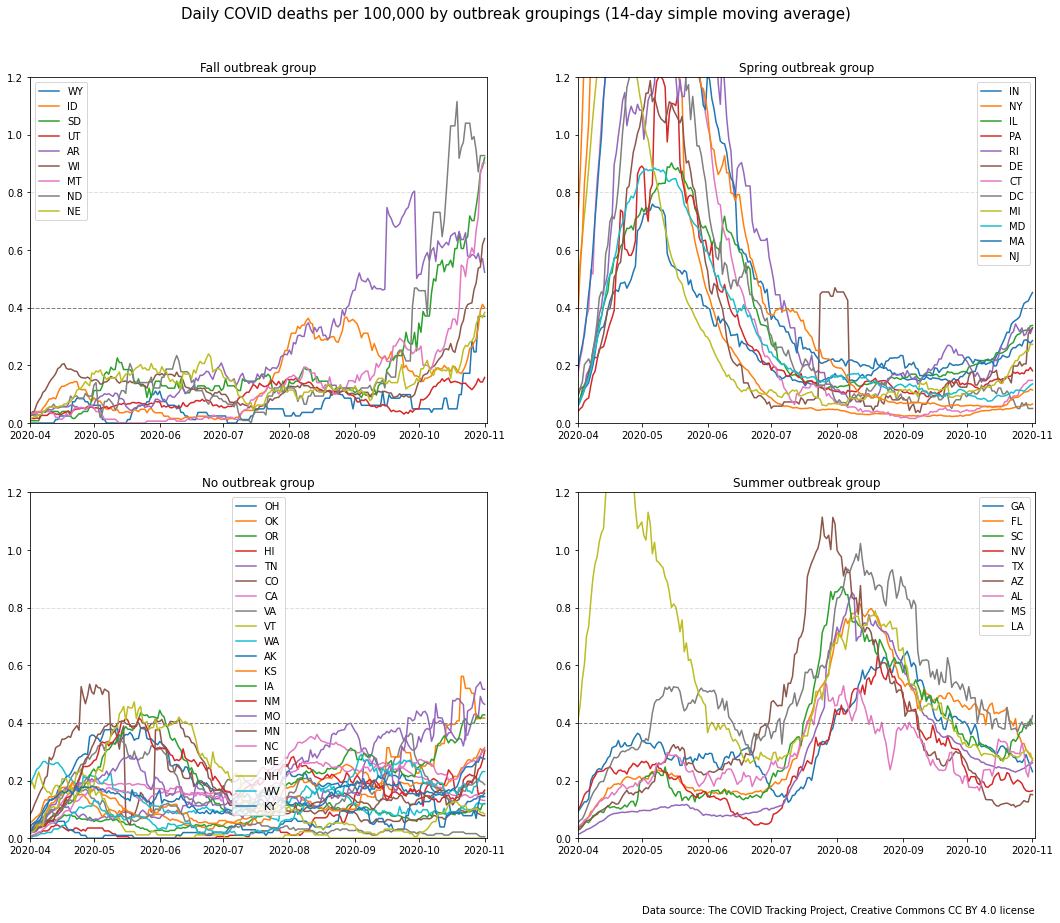

In [46]:
# Deaths per 100,000 by state over time
fig, ax = plt.subplots(2,2, figsize = (18,14))
plt.figtext(0.9, 0.05, 'Data source: The COVID Tracking Project, Creative Commons CC BY 4.0 license', horizontalalignment='right')
plt.suptitle(f'Daily COVID deaths per 100,000 by outbreak groupings (14-day simple moving average)', size=15, y=0.95)

i=0
for group in df_state['CVD_group'].unique():
    temp_df = df_state[df_state['CVD_group']==group]
    for chart_state in temp_df['state'].unique():
        state_df = temp_df[temp_df['state']== chart_state]
        ax[i//2][i%2].plot(state_df['date'], state_df['death_SMA'], label = chart_state)
    ax[i//2][i%2].axhline(y=0.8, ls= '--', lw=1, color = 'gray', alpha=0.25)
    ax[i//2][i%2].axhline(y=0.4, ls= '--', lw=1, color = 'gray')
    ax[i//2][i%2].set_xlim([datetime.date(2020, 4, 1), datetime.date.today()])
    ax[i//2][i%2].set_ylim([0,1.2])
    ax[i//2][i%2].set_title(f'{group} group')
    ax[i//2][i%2].legend()
    i += 1
plt.savefig('img/COVID-deaths-by-state.png')

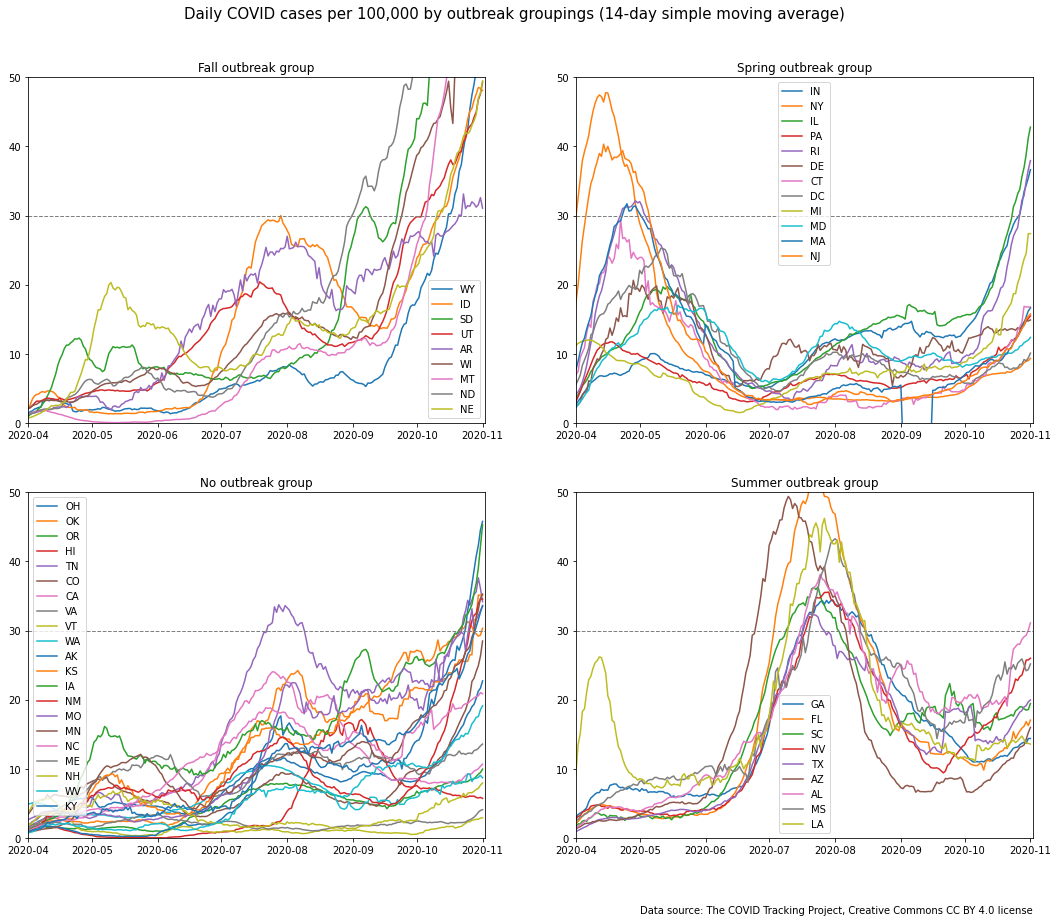

In [47]:
# Cases per 100,000 by state over time
fig, ax = plt.subplots(2,2, figsize = (18,14))
plt.figtext(0.9, 0.05, 'Data source: The COVID Tracking Project, Creative Commons CC BY 4.0 license', horizontalalignment='right')
plt.suptitle(f'Daily COVID cases per 100,000 by outbreak groupings (14-day simple moving average)', size=15, y=0.95)

i=0
for group in df_state['CVD_group'].unique():
    temp_df = df_state[df_state['CVD_group']==group]
    for chart_state in temp_df['state'].unique():
        state_df = temp_df[temp_df['state']== chart_state]
        ax[i//2][i%2].plot(state_df['date'], state_df['case_SMA'], label = chart_state)
    ax[i//2][i%2].axhline(y=30, ls= '--', lw=1, color = 'gray')
    ax[i//2][i%2].set_xlim([datetime.date(2020, 4, 1), datetime.date.today()])
    ax[i//2][i%2].set_ylim([0,50])
    ax[i//2][i%2].set_title(f'{group} group')
    ax[i//2][i%2].legend()
    i += 1
plt.savefig('img/COVID-cases-by-state.png')

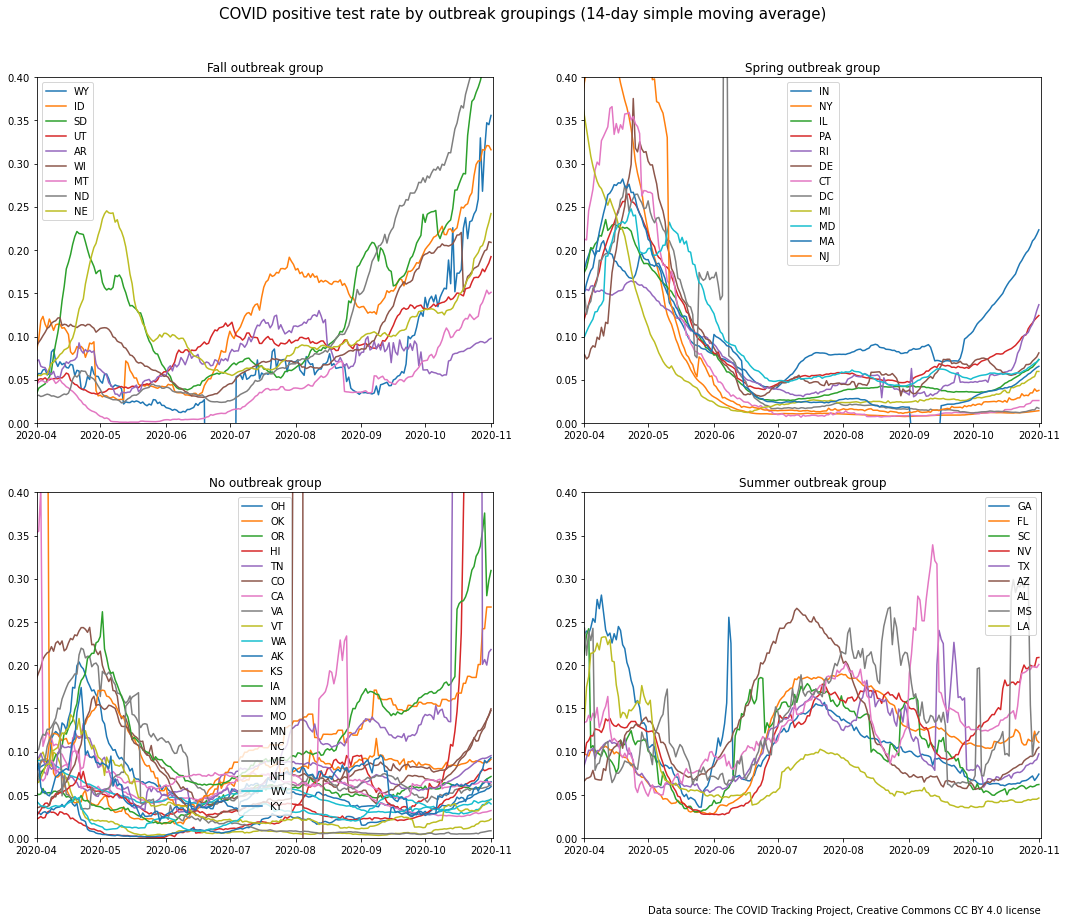

In [44]:
# Positive test rate by state over time
fig, ax = plt.subplots(2,2, figsize = (18,14))
plt.figtext(0.9, 0.05, 'Data source: The COVID Tracking Project, Creative Commons CC BY 4.0 license', horizontalalignment='right')
plt.suptitle(f'COVID positive test rate by outbreak groupings (14-day simple moving average)', size=15, y=0.95)

i=0
for group in df_state['CVD_group'].unique():
    temp_df = df_state[df_state['CVD_group']==group]
    for chart_state in temp_df['state'].unique():
        state_df = temp_df[temp_df['state']== chart_state]
        ax[i//2][i%2].plot(state_df['date'], state_df['positive_test_rate'], label = chart_state)
    ax[i//2][i%2].axhline(y=20, ls= '--', lw=1, color = 'gray')
    ax[i//2][i%2].set_xlim([datetime.date(2020, 4, 1), datetime.date.today()])
    ax[i//2][i%2].set_ylim([0,0.4])
    ax[i//2][i%2].set_title(f'{group} group')
    ax[i//2][i%2].legend()
    i += 1
plt.savefig('img/COVID-positive-test-rate-by-state.png')

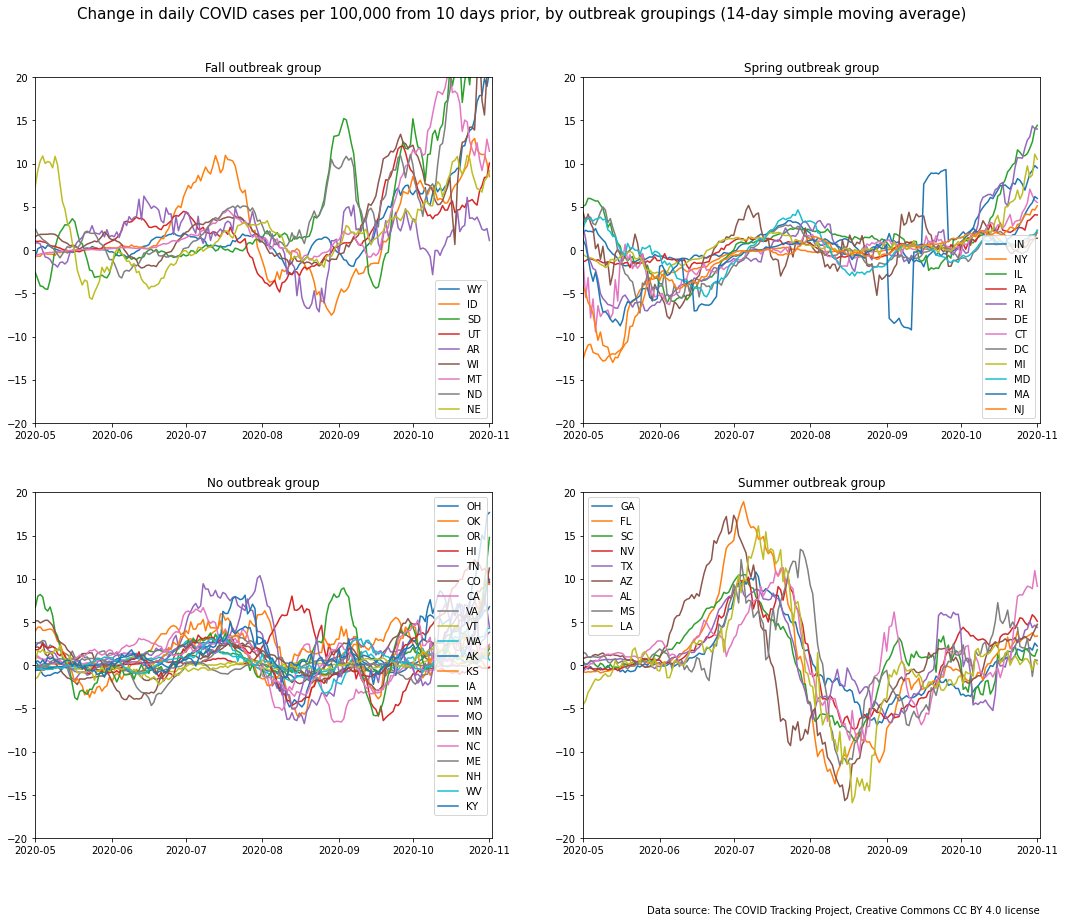

In [45]:
# Case rate change by state over time
fig, ax = plt.subplots(2,2, figsize = (18,14))
plt.figtext(0.9, 0.05, 'Data source: The COVID Tracking Project, Creative Commons CC BY 4.0 license', horizontalalignment='right')
plt.suptitle(f'Change in daily COVID cases per 100,000 from 10 days prior, by outbreak groupings (14-day simple moving average)', size=15, y=0.95)

i=0
for group in df_state['CVD_group'].unique():
    temp_df = df_state[df_state['CVD_group']==group]
    for chart_state in temp_df['state'].unique():
        state_df = temp_df[temp_df['state']== chart_state]
        ax[i//2][i%2].plot(state_df['date'], state_df['case_SMA_10_day_change'], label = chart_state)
#     ax[i//2][i%2].axhline(y=20, ls= '--', lw=1, color = 'gray')
    ax[i//2][i%2].set_xlim([datetime.date(2020, 5, 1), datetime.date.today()])
    ax[i//2][i%2].set_ylim([-20,20])
    ax[i//2][i%2].set_title(f'{group} group')
    ax[i//2][i%2].legend()
    i += 1

### Misc charts

In [21]:
chart_state = 'TN'
state_df = df_state[df_state['state']== chart_state]
state_df['case_SMA'] = state_df.iloc[:,3].rolling(window=14).mean()
state_df['death_SMA'] = state_df.iloc[:,4].rolling(window=14).mean()
temp_state_df = state_df[['date', 'death_SMA']]
temp_state_df['date'] = temp_state_df['date'] - timedelta(days=21)
state_df = state_df.merge(temp_state_df, on='date')

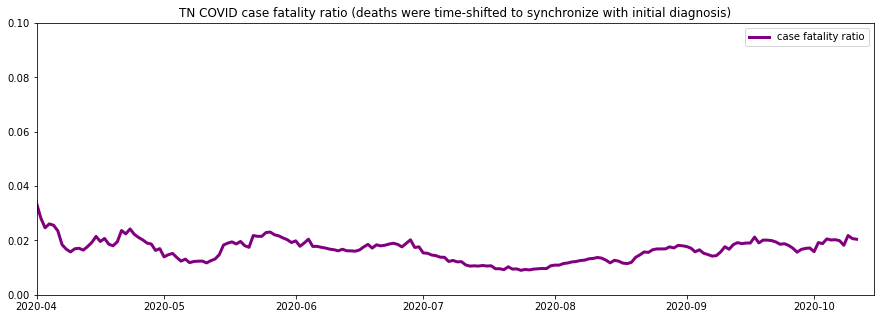

In [22]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(state_df['date'], state_df['death_SMA_y'] / state_df['case_SMA'], label = 'case fatality ratio', color = 'purple', lw=3)
ax.set_xlim([datetime.date(2020, 4, 1), datetime.date(2020, 10, 15)])
ax.set_ylim(0, 0.1)
ax.set_title(f'{chart_state} COVID case fatality ratio (deaths were time-shifted to synchronize with initial diagnosis)')
ax.legend()

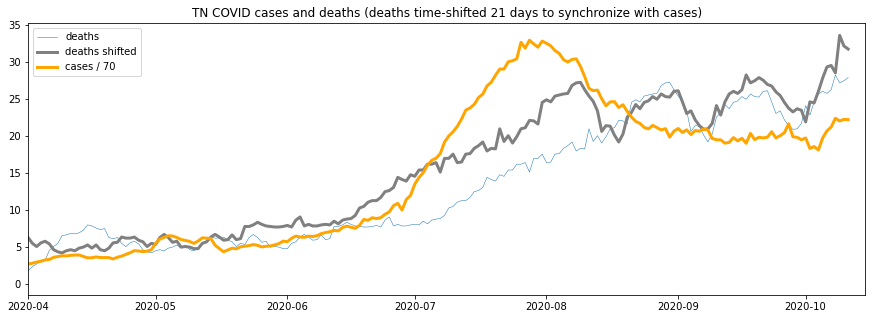

In [23]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(state_df['date'], state_df['death_SMA_x'], label = 'deaths', lw= .5)
ax.plot(state_df['date'], state_df['death_SMA_y'], label = 'deaths shifted', color = 'gray', lw=3)
ax.plot(state_df['date'], state_df['case_SMA'] / 70, label = 'cases / 70', color = 'orange', lw=3)
ax.set_xlim([datetime.date(2020, 4, 1), datetime.date(2020, 10, 15)])
ax.set_title(f'{chart_state} COVID cases and deaths (deaths time-shifted 21 days to synchronize with cases)')
ax.legend()

In [ ]:
# Case fatality ratio by state over time
fig, ax = plt.subplots(figsize = (15,7))
    
for chart_state in df_state['state'].unique()[first:last]:
    state_df = df_state[df_state['state']== chart_state]
    state_df['case_SMA'] = state_df.iloc[:,3].rolling(window=7).mean()
    state_df['death_SMA'] = state_df.iloc[:,4].rolling(window=7).mean()
    temp_state_df = state_df[['date', 'death_SMA']]
    temp_state_df['date'] = temp_state_df['date'] - timedelta(days=14)
    state_df = state_df.merge(temp_state_df, on='date')
    ax.plot(state_df['date'], state_df['death_SMA_y'] / state_df['case_SMA'], label = chart_state)
    ax.set_xlim([datetime.date(2020, 4, 1), datetime.date(2020, 10, 31)])
    ax.set_ylim(0, 0.1)
    ax.set_title(f'COVID case fatality ratio (deaths were time-shifted to synchronize with initial diagnosis)')
    ax.legend()

#### Issues with using positive test rate as a predictor

- Very noisy signal--Seattle Times reports it using a 28 day moving average (as compared to 14 days for cases and deaths)
- Why? 
- Test sites might have inherent differences in the types of people being tested. Clinics may be doing pre-procedural testing to confirm patients don't have COVID. Positive test rates from these sites will approximate disease prevalence among asymptomatic people, which is a very low number. Many of these clinics perform these tests only a few days a week.
- Locations run by public health agencies may be testing mostly symptomatic people on some of the days when they're open. Positive test rates from these sites on these days may exceed 25% or more.
- At different days for these same public health agency locations, they may test a high percentage of asymptomatic students from a school or employees from a company, thus reducing the positive test rate significantly.
- Different types of test methods have different false positive/false negative rates. If the balance of tests shifts (which is what we are seeing right now with more antigen detection rapid tests), this is going to result in differences in positive test rates.
- The number of tests from these different locations from different days will vary dramatically. Results from these tests get pooled together for reporting purposes, thus causing the positive test rate number to fluctuate for reasons that have nothing to do with changes in the actual infection rate.